# Subset Selection Problem

We will try to solve the subset selection problem (SSP) with cardinality constraint using Reinforcement Learning. \
Instead of the standard SSP, we will use the Mean-Variance formula provided from Markowitz, which is used in Modern Portfolio Management, but not used in Reinforcement Learning applications:

$$
max_x \sigma \mu^T x  - (1 - \sigma) x^T \Sigma x\\
s.t. \|x\|_0 \leq k,  x_i \in \mathbb{R}_+ \forall i \in \{0, 1, ..., n\}, \sum_i x_i = 1, \sigma \in [0, 1] 
$$

where $\Sigma \in \mathbb{R}^{n \times n}$ is the covariance matrix, $\mu \in \mathbb{R}^n$ is the expected returns vector, $x \in \mathbb{N}^n$ is the unknown weights allocation, $k \in \mathbb{N}$ is the cardinality constraint, $\sigma \in [0, 1]$ is the risk trade-off, and $n \in \mathbb{N}^*$ is the number of asset in the portfolio.


## Summary

- We train and test a model on indtrack7 dataset, with 1320 assets.

- We train a model on indtrack8 cropped at 1320 assets chosen randomly, then test it on indtrack7.


- The solution found by the DRL model is saved in a .xlsx file. The optimal value, expected return, variance and weights are also printed.

# Imports

In [1]:
from training import *
from environment import Environment
import pandas as pd
from stable_baselines3 import A2C, PPO # DDPG, DQN , SAC, TD3 could be studied
import itertools
from tqdm import tqdm

# Indtrack7

### This is a example of SSP_MV_vect use case on indtrack7.

#### vector_dict (dict): the parameters for the vectorized version

    - vector_size (int): the number of environments to run in parallel
    - seed (int): the seed to use for shuffling the columns of the data, default is 5
    - subsample (int): the number of columns to subsample from the data, default is -1 which means all columns
    - shuffle (bool): whether to shuffle the columns of the data across the environments, default is True, can't be False if subsample is not -1

#### model_dict (dict): the model to use and its parameters for learning

    - model_name (class from stable_baselines3): the model to use
    - policy (str): the policy to use, str class from stable_baselines3
    - device (str): the device to use, default is "cuda:0"
    - seed (int): the seed to use for the model, default is 5
    - n_steps (int): the number of steps to use for training before updating the model, default is 5 for A2C, 2048 for PPO
    - batch_size (int) [only for PPO]: the batch size to use for training, default is 64

#### training_dict (dict): the training parameters

    - seed (int): the seed to use for the model, default is 5
    - n_timesteps (int): the total timesteps to train the model on
    - save_model (str): the name of the file to save the model to

#### env_dict (dict): the environment parameters

    - sigma (float): the sigma, as the trade-off risk, default is 0.1
    - window_size (int): the window size, default is -1
    - random_nn (bool): whether to randomize the columns of the data, which would randomize the entries of the neural network, default is False
    - random_data (bool): whether to randomize the rows of the data, default is False
    - cardinality_constraint_mode (str): the cardinality constraint mode, default is "None"
    - cardinality_constraint (int): the cardinality constraint
    - shrinkage (bool): whether to use shrinkage, default is True
    - lambda_regularization (float): the lambda regularization for Ridge regularization, default is 0
    
#### policy_dict (dict): the policy parameters

    - net_arch (list): the architecture of the neural network

Key policy not in dict. Using default value MlpPolicy. - Key device not in dict. Using default value cuda:0. - Key seed not in dict. Using default value 5.
Key window_size not in dict. Using default value -1.
Key seed not in dict. Using default value 5. - Key subsample not in dict. Using default value -1.


Output()

Training time: 1795.876 seconds.


100%|██████████| 290/290 [02:52<00:00,  1.68it/s]


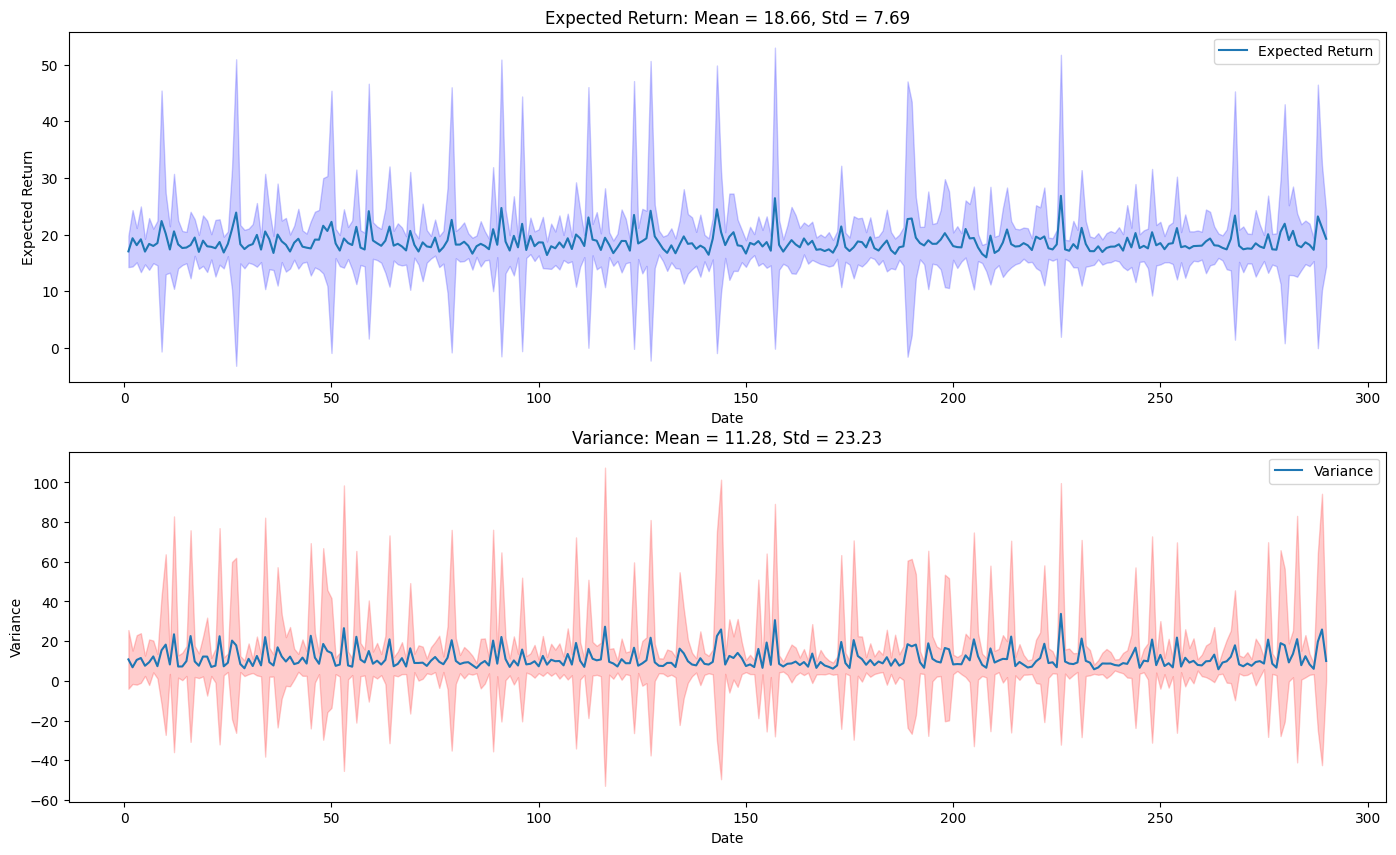

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  4.616
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.0889 0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.    

In [2]:
vector_dict={"vector_size": 20, "shuffle": True}
model_dict={"model_name": A2C}
env_dict={"data": read_stock_file("Data/indtrack7.txt"), "sigma": 0.5, "random_nn": True, "random_data": True, "cardinality_constraint": 10, "cardinality_constraint_mode": "renormalize", "lambda_regularization": 1.0, "shrinkage": False}
policy_dict={"net_arch":[16, 16]}
training_dict={"seed": 5, "n_timesteps": 40000, "model_save": f"Models/{model_dict['model_name'].__name__}_{env_dict['sigma']}_{env_dict['cardinality_constraint']}_{env_dict['cardinality_constraint_mode']}_{env_dict['lambda_regularization']}_{'_'.join(str(x) for x in policy_dict['net_arch'])}_{vector_dict['vector_size']}.zip"}
xlsx_name = "Sheets/examples.xlsx-indtrack7"

SSP_MV_vect(vector_dict= vector_dict, model_dict= model_dict, training_dict= training_dict, env_dict= env_dict, policy_dict= policy_dict, xlsx_name= xlsx_name)


# Transfert Learning indtrack 8 → indtrack 7

### This is a example of training a model on indtrack8, then testing it on indtrack 7



  0%|          | 0/16 [00:00<?, ?it/s]

Key device not in dict. Using default value cuda:0. - Key seed not in dict. Using default value 5.
Key window_size not in dict. Using default value -1.
Key seed not in dict. Using default value 5.


Output()

Training time: 1948.877 seconds.


100%|██████████| 290/290 [02:57<00:00,  1.63it/s]


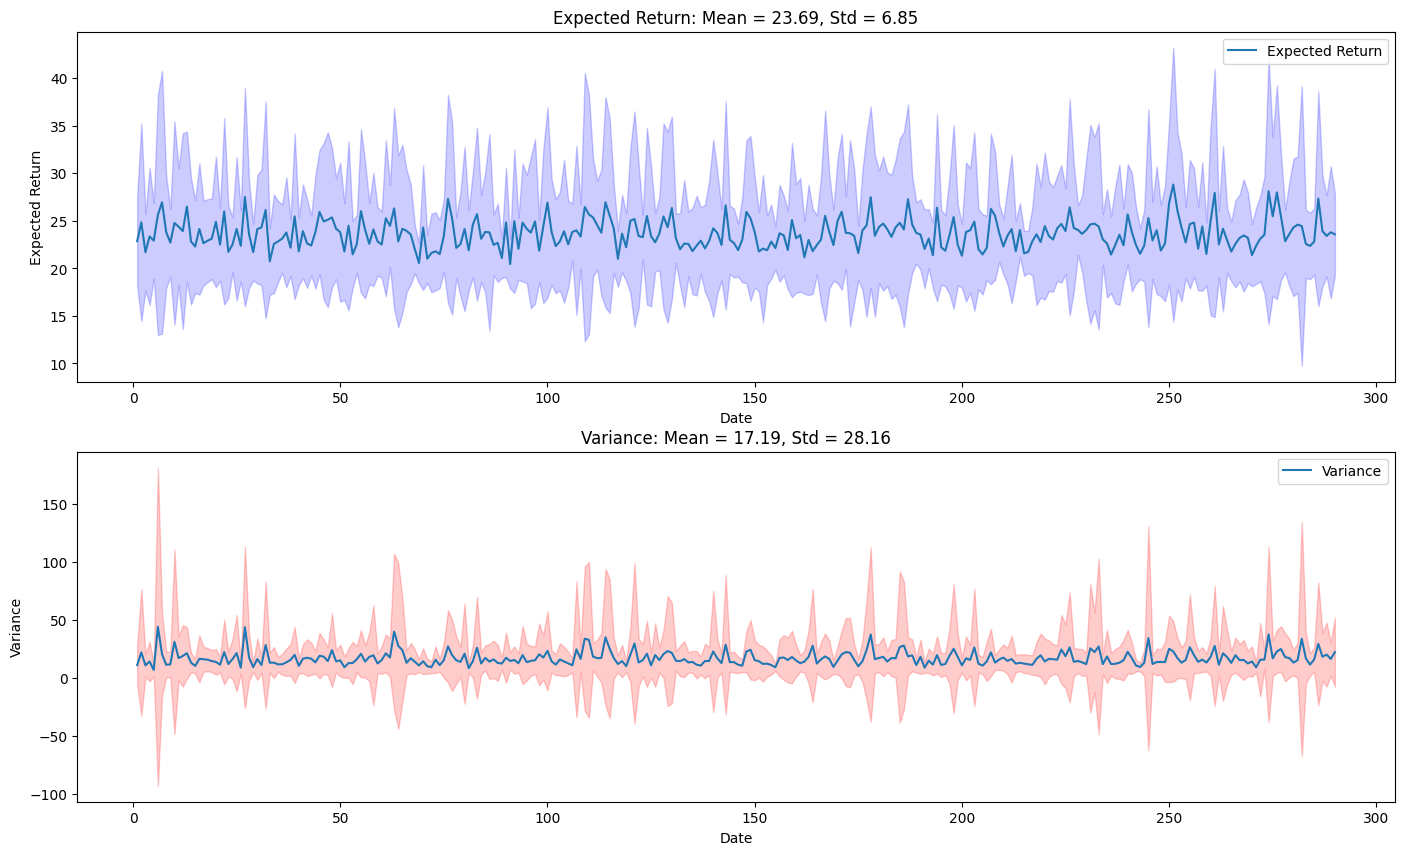

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  0.5852
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.   

Output()

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  5.508
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.0994 0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.1108 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.    

  6%|▋         | 1/16 [51:11<12:47:57, 3071.86s/it]

Values don't exist. Adding values.
Key device not in dict. Using default value cuda:0. - Key seed not in dict. Using default value 5.
Key window_size not in dict. Using default value -1.
Key seed not in dict. Using default value 5.


Output()

Training time: 1706.128 seconds.


100%|██████████| 290/290 [02:55<00:00,  1.65it/s]


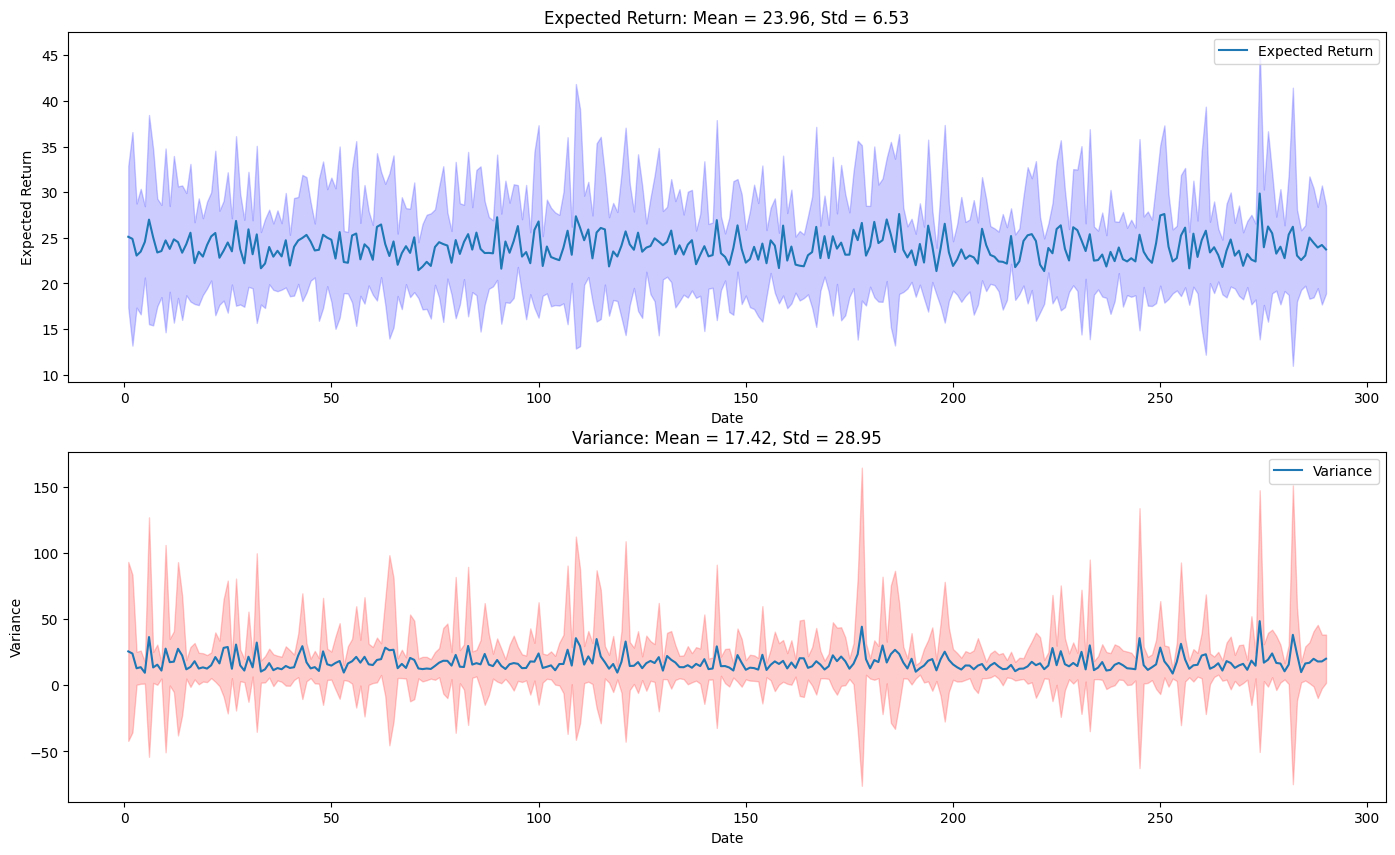

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  1.826
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.0876 0.
 0.1153 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.    

Output()

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  5.7496
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.099  0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.   

 12%|█▎        | 2/16 [1:36:26<11:07:41, 2861.54s/it]

Values don't exist. Adding values.
Key device not in dict. Using default value cuda:0. - Key seed not in dict. Using default value 5.
Key window_size not in dict. Using default value -1.
Key seed not in dict. Using default value 5.


Output()

Training time: 1734.892 seconds.


100%|██████████| 290/290 [02:55<00:00,  1.65it/s]


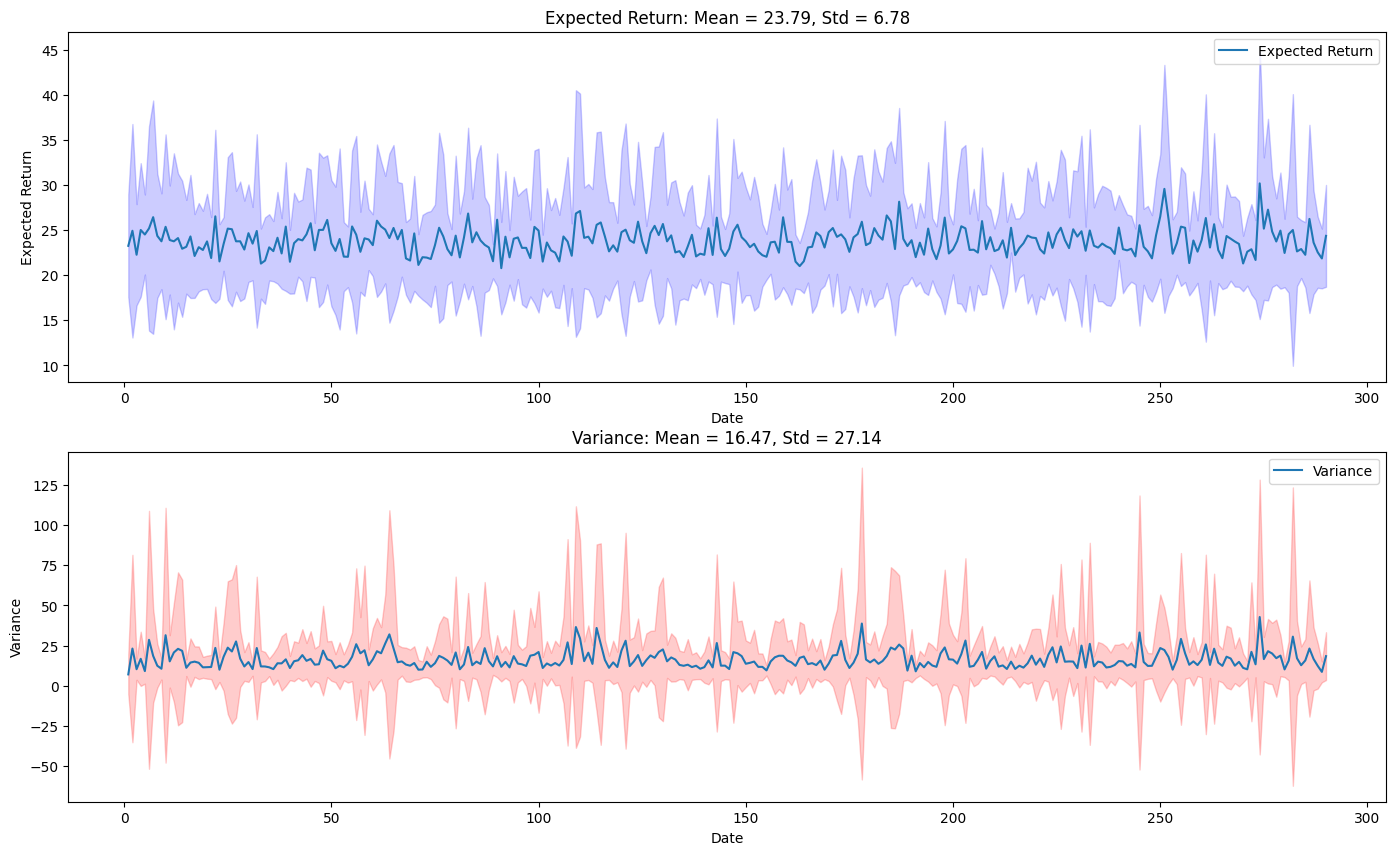

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  2.9758
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.0908 0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.   

Output()

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  5.7147
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.   

 19%|█▉        | 3/16 [2:22:06<10:08:00, 2806.19s/it]

Key device not in dict. Using default value cuda:0. - Key seed not in dict. Using default value 5.
Key window_size not in dict. Using default value -1.
Key seed not in dict. Using default value 5.


Output()

Training time: 1700.634 seconds.


100%|██████████| 290/290 [02:48<00:00,  1.72it/s]


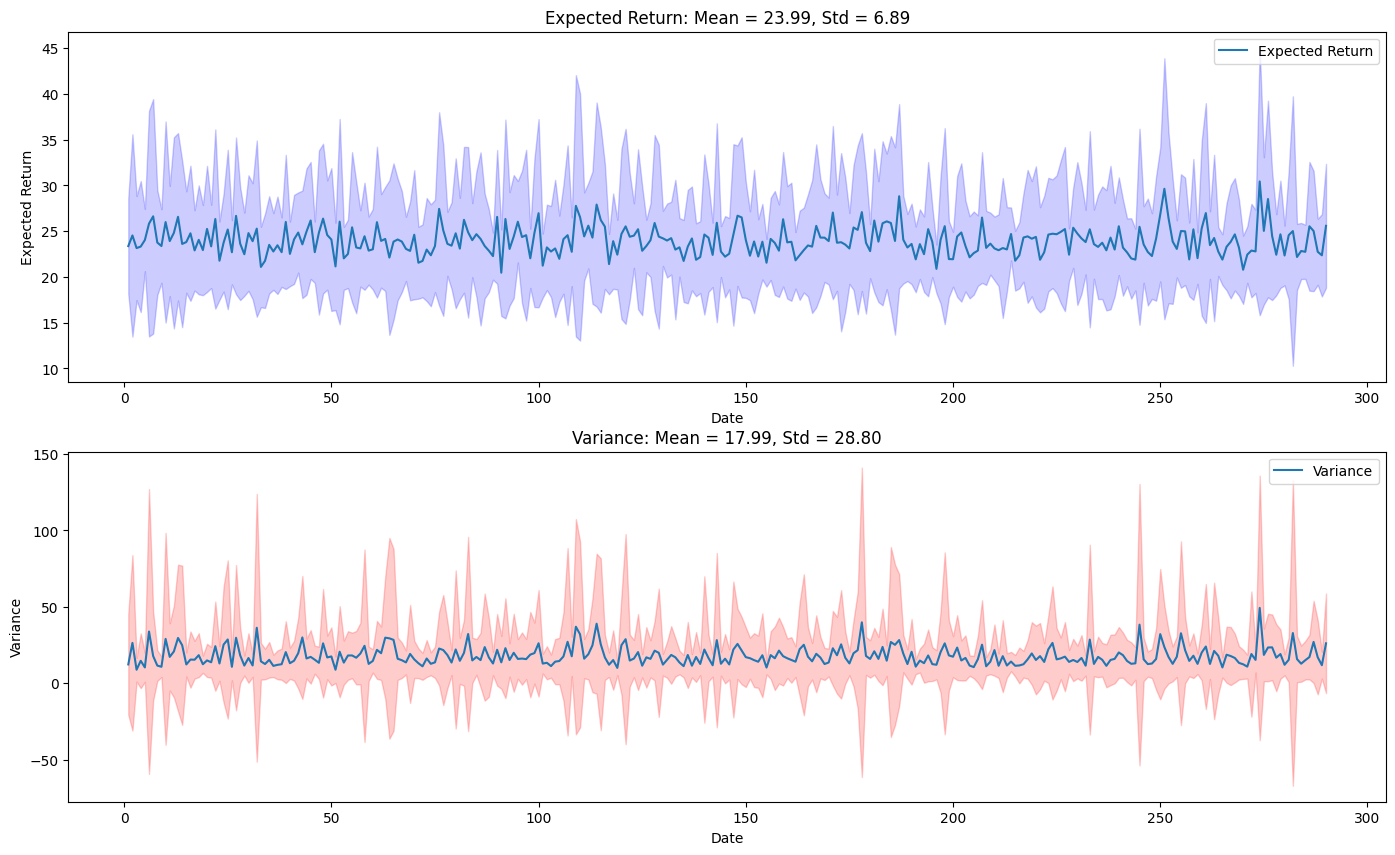

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  -0.2396
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.  

Output()

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  5.753
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.1014 0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.1149 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.    

 25%|██▌       | 4/16 [3:06:46<9:11:15, 2756.25s/it] 

Key device not in dict. Using default value cuda:0. - Key seed not in dict. Using default value 5.
Key window_size not in dict. Using default value -1.
Key seed not in dict. Using default value 5.


Output()

Training time: 1637.908 seconds.


100%|██████████| 290/290 [02:53<00:00,  1.67it/s]


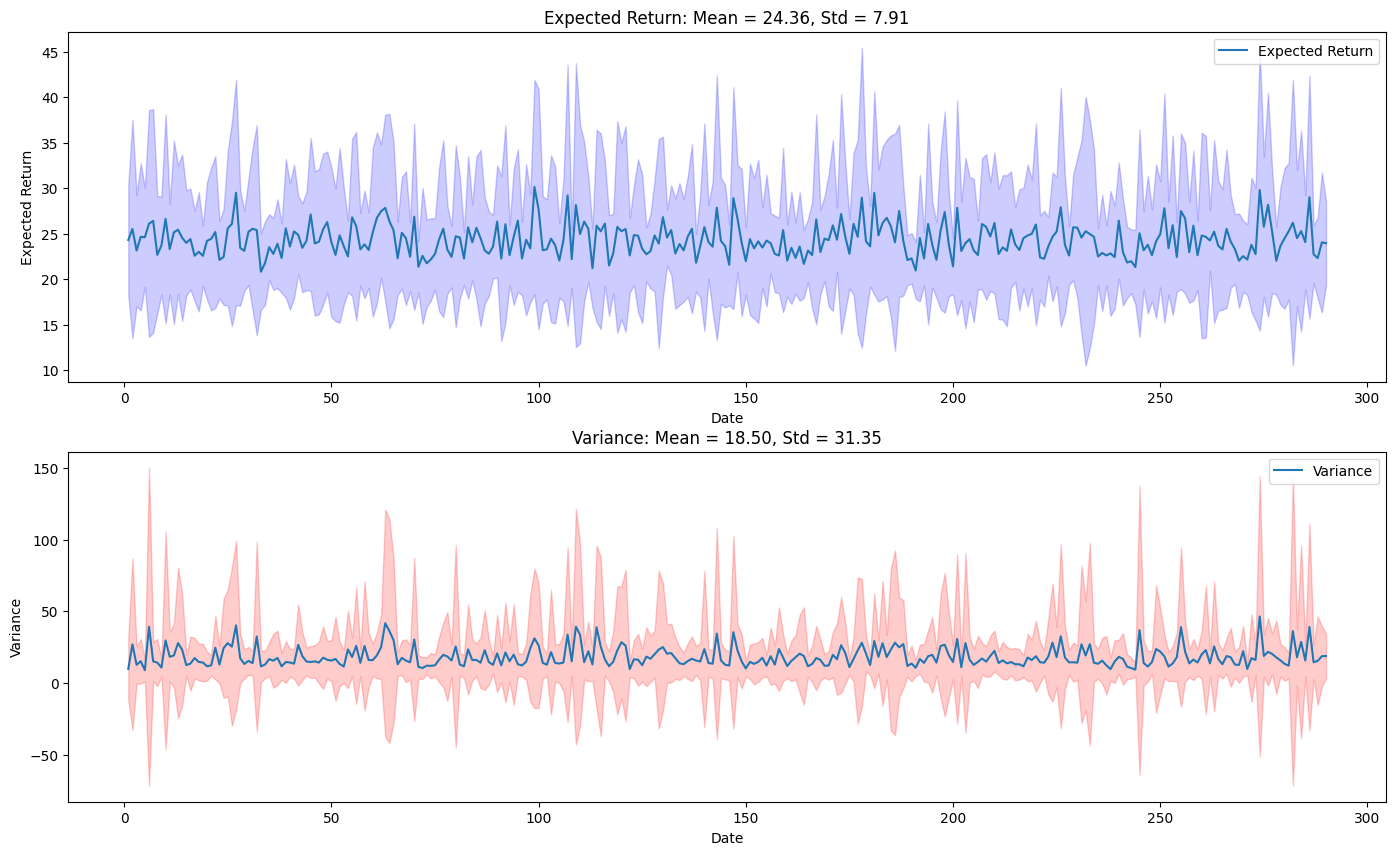

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  11.1148
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.089  0.
 0.111  0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.  

Output()

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  11.0275
 | Maximum Value weights:  [0.0951 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.09   0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.1154 0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.  

 31%|███▏      | 5/16 [3:50:54<8:18:09, 2717.24s/it]

Key device not in dict. Using default value cuda:0. - Key seed not in dict. Using default value 5.
Key window_size not in dict. Using default value -1.
Key seed not in dict. Using default value 5.


Output()

Training time: 1674.479 seconds.


100%|██████████| 290/290 [02:55<00:00,  1.65it/s]


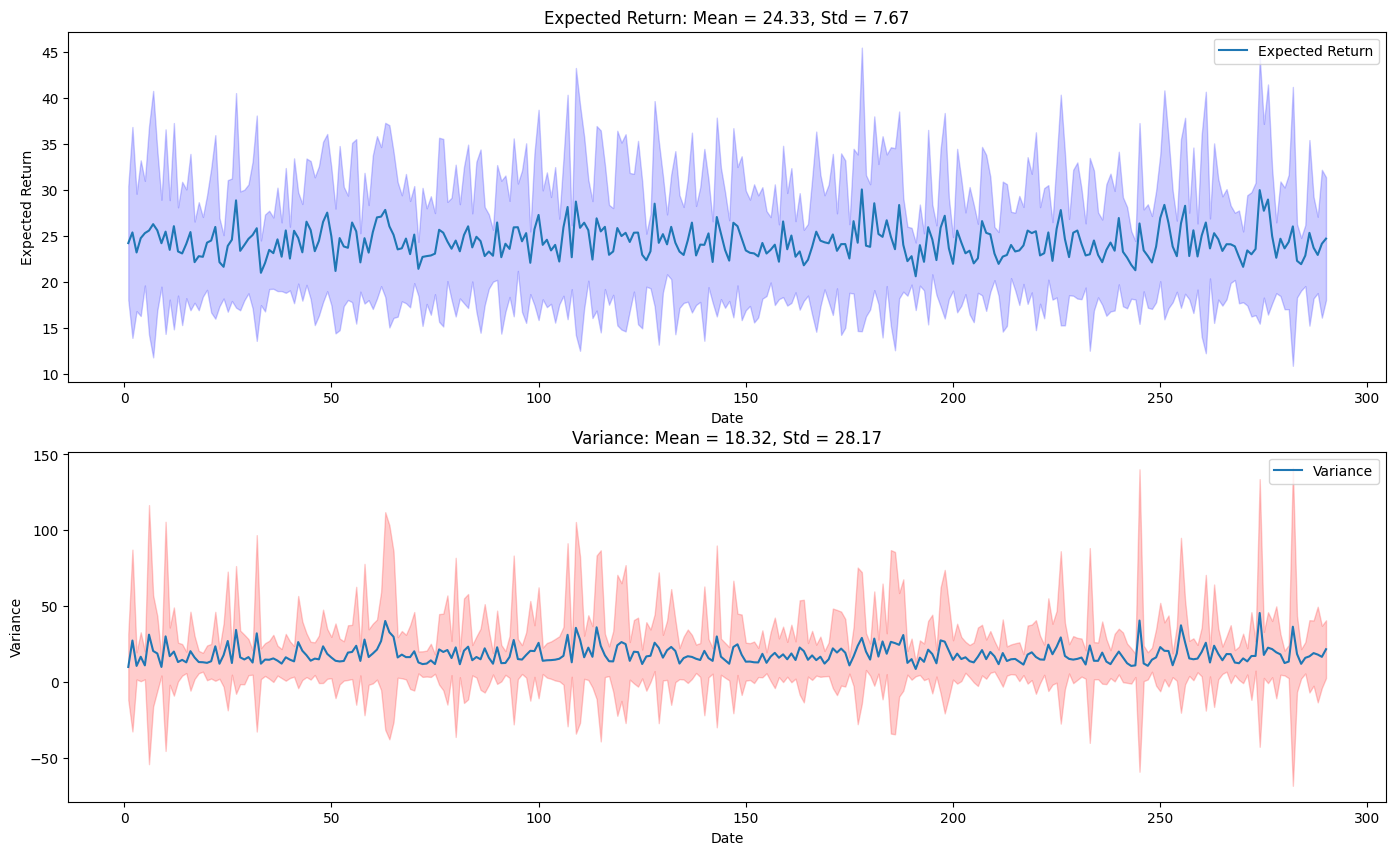

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  10.765
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.   

Output()

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  10.4727
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.0887 0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.1182 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.  

 38%|███▊      | 6/16 [4:36:10<7:32:49, 2716.90s/it]

Key device not in dict. Using default value cuda:0. - Key seed not in dict. Using default value 5.
Key window_size not in dict. Using default value -1.
Key seed not in dict. Using default value 5.


Output()

Training time: 1763.963 seconds.


100%|██████████| 290/290 [02:59<00:00,  1.62it/s]


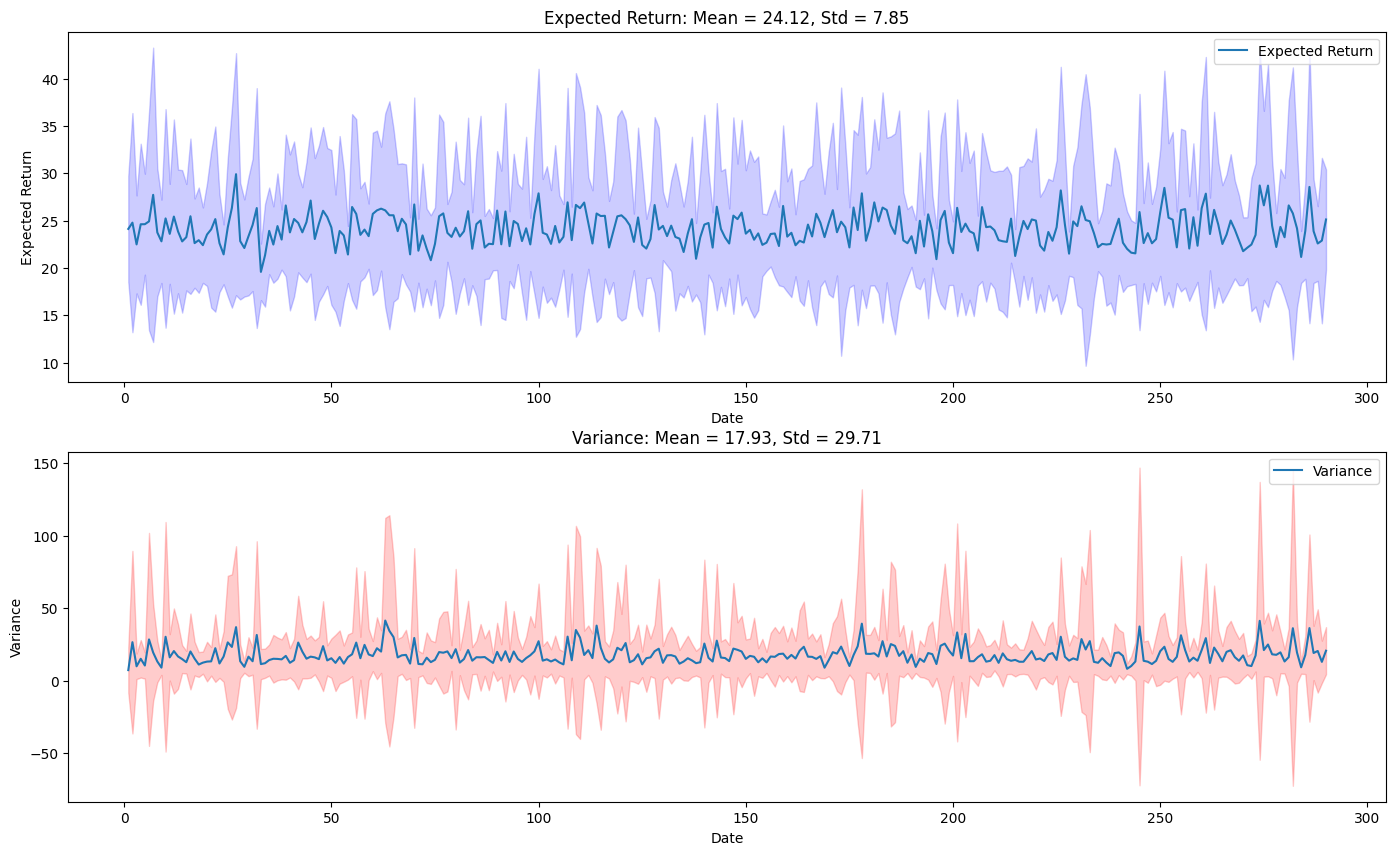

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  11.3531
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.  

Output()

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  10.4886
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.0905 0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.1261 0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.  

 44%|████▍     | 7/16 [5:23:00<6:52:05, 2747.23s/it]

Key device not in dict. Using default value cuda:0. - Key seed not in dict. Using default value 5.
Key window_size not in dict. Using default value -1.
Key seed not in dict. Using default value 5.


Output()

Training time: 1698.904 seconds.


100%|██████████| 290/290 [02:55<00:00,  1.65it/s]


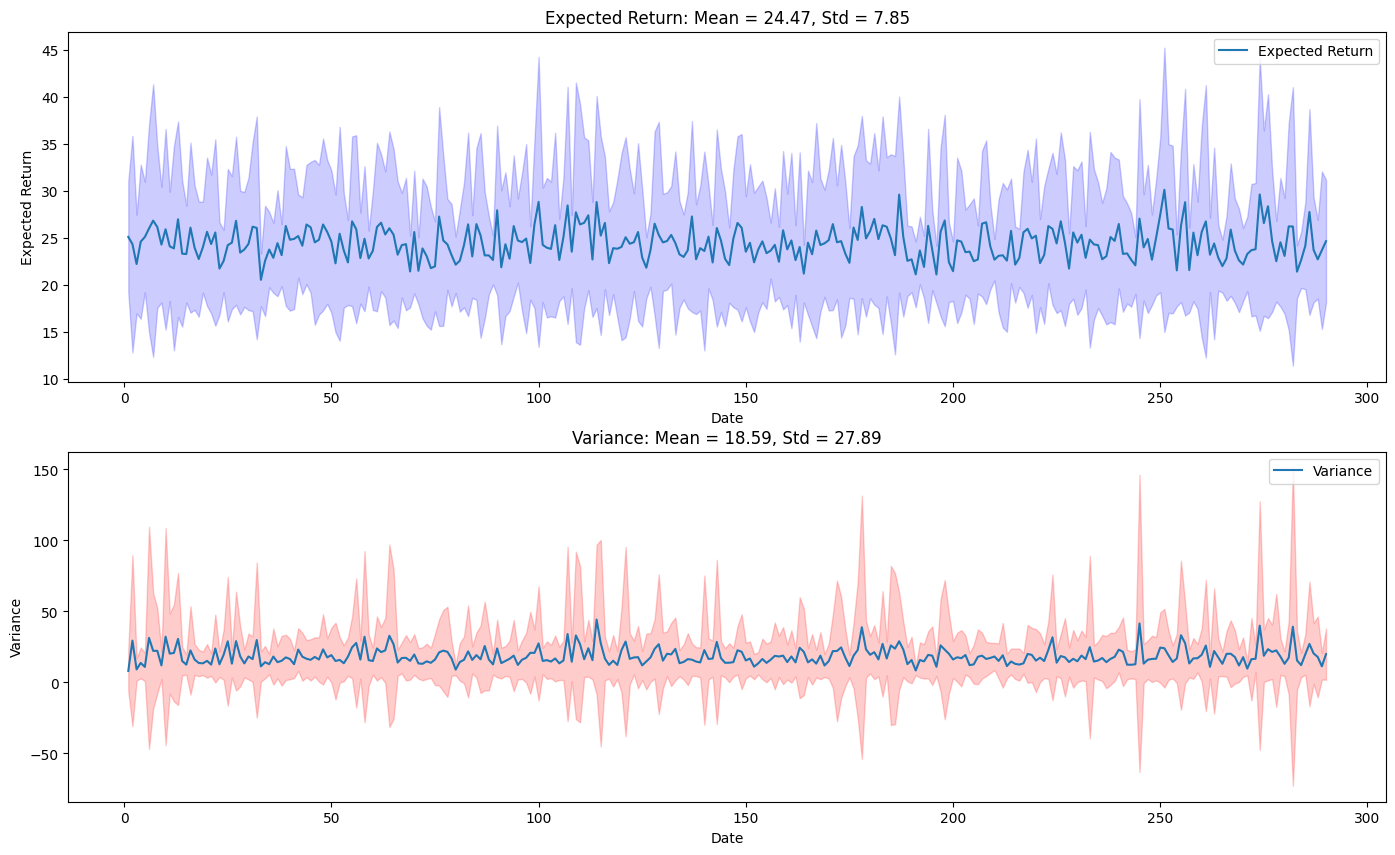

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  11.2689
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.  

Output()

### Results for <class 'stable_baselines3.a2c.a2c.A2C'>
 | Optimal value:  10.4523
 | Maximum Value weights:  [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.  

 50%|█████     | 8/16 [6:07:45<6:03:38, 2727.37s/it]

Values don't exist. Adding values.
Key device not in dict. Using default value cuda:0. - Key seed not in dict. Using default value 5.
Key window_size not in dict. Using default value -1.
Key seed not in dict. Using default value 5.


c:\Users\Victo\AppData\Local\Programs\Python\Python310\lib\site-packages\stable_baselines3\ppo\ppo.py:155: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 100`, after every 1 untruncated mini-batches, there will be a truncated mini-batch of size 36
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=5 and n_envs=20)
  warnings.warn(


Output()

 50%|█████     | 8/16 [6:29:11<6:29:11, 2918.96s/it]

In [2]:
### Grid search
model_names = [A2C, PPO]
sigmas = [0.5, 0.7]
n_steps = [5]
constraints = [10]
lambda_regularization = [1.0, 2.0, 5.0, 10**-6]
net_archs = [[32, 16, 16, 32]]
data = read_stock_file("Data/indtrack8.txt")
data_test = read_stock_file("Data/indtrack7.txt")
def env_creator(seed):
    np.random.seed(seed)
    return Environment(**env_dict)
combinations = list(itertools.product(model_names, sigmas, n_steps, constraints, lambda_regularization, net_archs))




for model_name, sigma, n_step, constraint, lambda_r, net_arch in tqdm(combinations):
    vector_dict={"vector_size": 20, "shuffle": True, "subsample": 1320}
    model_dict={"model_name": model_name, "n_steps": n_step, "policy": "MlpPolicy"}
    training_dict={"seed": 5, "n_timesteps": 40000,  "save_model": f"models/ind8/{model_name.__name__}_{sigma}_{n_step}_{constraint}_{lambda_r}_{'_'.join(str(x) for x in net_arch)}.zip"}
    env_dict={"data": data, "sigma": sigma, "random_nn": True, "random_data": True, "cardinality_constraint": int(constraint), "cardinality_constraint_mode": "renormalize", "lambda_regularization": lambda_r, "shrinkage": False}
    policy_dict={"net_arch": net_arch}
    xlsx_name="Sheets/Results.xlsx-indtrack8"
    
    
    ### Training
    SSP_MV_vect(vector_dict, model_dict, training_dict, env_dict, policy_dict, xlsx_name)


    ### Testing
    time_start = time()
    env_dict["data"] = data_test
    env_list = []
    info = {"training time": 0, "testing time": 0}
    for i in range(vector_dict["vector_size"]):
        env_list.append(env_creator(i))
    DummyVec = DummyVecEnv([(lambda env: lambda: env)(outer_env) for outer_env in env_list])
    model = model_name.load(training_dict["save_model"], env=DummyVec)
    training_dict["n_timesteps"] = 8000
    model.learn(training_dict["n_timesteps"], progress_bar=True)
    time_end = time()
    info["training time"] += time_end - time_start

    time_start = time()
    env_list = []
    for i in range(vector_dict["vector_size"]):
        env_list.append(env_creator(training_dict["seed"]))
    DummyVec = DummyVecEnv([(lambda env: lambda: env)(outer_env) for outer_env in env_list])
    obs = DummyVec.reset()
    model.set_random_seed(5)
    for _ in range(data.shape[0]-1):
        action, states = model.predict(obs)
        obs, rewards, done, info_d = DummyVec.step(action)
    memory_expected_return = DummyVec.env_method(method_name="get_memory_expected_return")
    memory_variance = DummyVec.env_method(method_name="get_memory_variance")
    memory_weights = DummyVec.env_method(method_name="get_memory_weights")
    expected_return = np.array(memory_expected_return)
    variance = np.array(memory_variance)
    weights = np.array(memory_weights)
    time_end = time()
    info["testing time"] += time_end - time_start

    info_new = print_results(expected_return, variance, weights, model_dict, env_dict, info)
    
    save_to_xlsx(vector_dict, model_dict, training_dict, env_dict, policy_dict, info_new, "Sheets/Results.xlsx-Transfert")